In [1]:
pwd

u'C:\\Users\\jeana\\Documents\\GA final project'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

### Problem Statement:
Using the Freddie Mac loan level origination datasets of randomly selected single-family mortgage loans for each origination year: We will explore different origination trends pre and post the financial crisis.  

We use loans originated in 2006 to represent pre-crisis and loans originated 2014 to represent post-crisis

### Step 1:  pull in the 2006 and 2014 datasets, merge, clean and choose a subset of loans and relevant variables

In [3]:
#pull in 2006 data; add column headers to dataset, organize so loan ID is the index
header_orig=['fico','first_pay_date','first_time_homebuyer','mature_date','msa','mi_pct','units','occupancy','cltv','dti','orig_bal','ltv','init_rate','channel','prepay','product','state','prop_type','prop_zip','loan_id','purpose','orig_term','num_borrowers','seller','servicer','super_conforming']
df_2006_O = pd.read_csv('sample_orig_2006.txt',sep='|',names=header_orig, index_col='loan_id')

In [4]:
#we then add an orig yr column to mark the loans in this dataset as 2006 origination
df_2006_O['orig_yr']=2006

In [5]:
df_2006_O.head()

,fico,first_pay_date,first_time_homebuyer,mature_date,msa,mi_pct,units,occupancy,cltv,dti,...,state,prop_type,prop_zip,purpose,orig_term,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,,,,,
F106Q1000086,790,200603,N,203602,NaN,0,1,O,80.0,27,...,KY,SF,40300,C,360,2.0,Other sellers,USBANKNA,NaN,2006
F106Q1000096,755,200603,N,203602,NaN,30,1,O,95.0,52,...,OK,SF,74500,P,360,2.0,Other sellers,Other servicers,NaN,2006
F106Q1000105,660,200603,NaN,203602,28740.0,0,1,O,37.0,40,...,NY,SF,12500,C,360,1.0,Other sellers,Other servicers,NaN,2006
F106Q1000192,714,200603,N,203602,45820.0,0,1,O,64.0,23,...,KS,SF,66400,P,360,1.0,Other sellers,Other servicers,NaN,2006
F106Q1000240,687,200603,N,203602,NaN,0,1,O,61.0,46,...,NC,SF,27200,C,360,1.0,Other sellers,USBANKNA,NaN,2006


In [6]:
#pull in 2014 data; add column headers to dataset, organize so loan ID is the index
header_orig=['fico','first_pay_date','first_time_homebuyer','mature_date','msa','mi_pct','units','occupancy','cltv','dti','orig_bal','ltv','init_rate','channel','prepay','product','state','prop_type','prop_zip','loan_id','purpose','orig_term','num_borrowers','seller','servicer','super_conforming']
df_2014_O = pd.read_csv('sample_orig_2014.txt',sep='|',names=header_orig, index_col='loan_id')


C:\Users\jeana\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#we then add an orig yr column to mark these loans as 2014 origination
df_2014_O['orig_yr']=2014

In [8]:
df_2014_O.head()

,fico,first_pay_date,first_time_homebuyer,mature_date,msa,mi_pct,units,occupancy,cltv,dti,...,state,prop_type,prop_zip,purpose,orig_term,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,,,,,
F114Q1000005,725,201403,NaN,204402,17860.0,0,1,O,80.0,20,...,MO,SF,65200,N,360,2,Other sellers,"PNCBANK,NATL",NaN,2014
F114Q1000031,780,201403,NaN,204402,30700.0,0,1,O,80.0,44,...,NE,PU,68500,N,360,2,Other sellers,Other servicers,NaN,2014
F114Q1000037,661,201405,N,204404,39580.0,0,1,O,80.0,22,...,NC,SF,27600,P,360,1,Other sellers,NATIONSTARMTGELLC,NaN,2014
F114Q1000058,745,201404,NaN,204403,10580.0,0,1,O,43.0,16,...,NY,SF,12000,C,360,2,Other sellers,Other servicers,NaN,2014
F114Q1000068,781,201403,N,204402,43580.0,0,1,O,80.0,14,...,IA,SF,51100,P,360,2,Other sellers,Other servicers,NaN,2014


In [9]:
print df_2006_O.shape
# our 2006 data has 50,000 rows and 26 features
print df_2006_O.count().sort_values()
# we see most columns are fully populated; even ones that arent are close
# super conforming is not populated because this product was introduced in 2009 

(50000, 26)
super_conforming            0
msa                     41791
first_time_homebuyer    45414
prepay                  49935
dti                     49955
num_borrowers           49983
cltv                    49999
ltv                     49999
fico                    50000
servicer                50000
seller                  50000
orig_term               50000
purpose                 50000
prop_zip                50000
prop_type               50000
state                   50000
init_rate               50000
channel                 50000
orig_bal                50000
occupancy               50000
units                   50000
mi_pct                  50000
mature_date             50000
first_pay_date          50000
product                 50000
orig_yr                 50000
dtype: int64


In [10]:
print df_2014_O.shape
# our data also has 50,000 rows and 26 features
print df_2014_O.count().sort_values()
# there are some null values.  we will eventually drop the super_conforming column and the rest of the null values

(50000, 26)
super_conforming         1995
first_time_homebuyer    25607
msa                     44970
prepay                  49988
cltv                    49999
ltv                     49999
fico                    50000
servicer                50000
seller                  50000
num_borrowers           50000
orig_term               50000
purpose                 50000
prop_zip                50000
prop_type               50000
state                   50000
init_rate               50000
channel                 50000
orig_bal                50000
dti                     50000
occupancy               50000
units                   50000
mi_pct                  50000
mature_date             50000
first_pay_date          50000
product                 50000
orig_yr                 50000
dtype: int64


In [11]:
#combine 2006 and 2014 data into one dataset:  orig_data.  Then check using .sample()
orig_data=df_2006_O.append(df_2014_O)
orig_data.sample(10)


,fico,first_pay_date,first_time_homebuyer,mature_date,msa,mi_pct,units,occupancy,cltv,dti,...,state,prop_type,prop_zip,purpose,orig_term,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,,,,,
F114Q3050074,691,201409,NaN,202908,31084.0,0,1,I,24.0,49,...,CA,SF,91300,C,180,1.0,"CALIBERHOMELOANS,INC","CALIBERHOMELOANS,INC",NaN,2014
F106Q3035065,648,200609,N,203608,15380.0,0,1,O,74.0,40,...,NY,SF,14100,C,360,2.0,"ABNAMROMTGEGROUP,INC","CITIMORTGAGE,INC",NaN,2006
F106Q4015899,720,200612,N,203611,11700.0,0,1,O,65.0,36,...,NC,SF,28700,N,360,1.0,CHASEHOMEFINANCELLC,"JPMORGANCHASEBANK,NA",NaN,2006
F114Q4120045,816,201412,Y,204411,37964.0,0,1,O,71.0,29,...,PA,SF,19000,P,360,1.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2014
F106Q3135745,596,200611,N,203610,25540.0,25,1,O,90.0,33,...,CT,CO,6400,P,360,1.0,GMACMTGECORP,Other servicers,NaN,2006
F106Q3249190,798,200610,Y,203609,35644.0,0,3,O,80.0,43,...,NY,SF,11300,P,360,1.0,CHASEHOMEFINANCELLC,"JPMORGANCHASEBANK,NA",NaN,2006
F106Q1192133,766,200605,Y,203604,47894.0,0,1,O,80.0,39,...,MD,SF,20700,P,360,2.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2006
F114Q1109329,702,201405,NaN,204404,41740.0,0,1,I,75.0,40,...,CA,SF,92000,C,360,1.0,Other sellers,Other servicers,NaN,2014
F106Q3042807,657,200610,NaN,203609,NaN,0,1,O,80.0,36,...,WI,SF,53500,N,360,2.0,Other sellers,Other servicers,NaN,2006


In [12]:
orig_data.shape

(100000, 26)

In [13]:
# Our merged dataset has 100,000 rows and 26 columns.  
# First we control for the most common type of mortgage:  
# We filter the data to look at only: 30 year fixed rate loans on 1-unit single family homes with no prepay penalty
orig_subset=orig_data.loc[orig_data['orig_term']==360]
orig_subset=orig_subset.loc[orig_subset['units']==1]
orig_subset=orig_subset.loc[orig_subset['product']=='FRM']
orig_subset=orig_subset.loc[orig_subset['prop_type']=='SF']
orig_subset=orig_subset.loc[orig_subset['prepay']=='N']

orig_subset.sample(10)


,fico,first_pay_date,first_time_homebuyer,mature_date,msa,mi_pct,units,occupancy,cltv,dti,...,state,prop_type,prop_zip,purpose,orig_term,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,,,,,
F114Q4230661,765,201502,NaN,204501,26140.0,0,1,S,79.0,40,...,FL,SF,34400,P,360,2.0,PENNYMACCORP,PENNYMACCORP,NaN,2014
F106Q3222394,775,200610,NaN,203609,37340.0,0,1,I,80.0,54,...,FL,SF,32900,P,360,2.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2006
F114Q4099744,762,201412,Y,204411,26620.0,25,1,O,90.0,31,...,AL,SF,35800,P,360,1.0,USBANKNA,USBANKNA,NaN,2014
F106Q1001819,725,200603,N,203602,45780.0,0,1,O,80.0,44,...,OH,SF,43500,P,360,2.0,Other sellers,Other servicers,NaN,2006
F106Q4008682,772,200612,N,203611,44140.0,0,1,O,79.0,29,...,MA,SF,1000,C,360,1.0,COUNTRYWIDE,BACHOMELOANSERVICING,NaN,2006
F106Q4226636,747,200702,NaN,203701,41740.0,0,1,O,36.0,26,...,CA,SF,92100,C,360,2.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2006
F114Q2016275,734,201406,NaN,204405,31084.0,0,1,I,60.0,32,...,CA,SF,90700,C,360,1.0,QUICKENLOANINC,QUICKENLOANINC,NaN,2014
F114Q2027553,686,201406,N,204405,10900.0,30,1,O,95.0,44,...,PA,SF,18000,P,360,2.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2014
F114Q2040121,754,201406,Y,204405,33460.0,0,1,O,80.0,40,...,MN,SF,56300,P,360,1.0,"GUARANTEEDRATE,INC",NATIONSTARMTGELLC,NaN,2014


In [14]:
#we then filter out some columns that are likely redundant/too granular (based on industry expertise)
orig_subset=orig_subset.drop(['msa','prop_zip','super_conforming','cltv'],axis=1)
# and we filter out the sparsely populated first time homebuyer column:
orig_subset=orig_subset.drop(['first_time_homebuyer'],axis=1)
# and since we added orig year, we can drop first_pay_date and mature_date
orig_subset=orig_subset.drop(['first_pay_date','mature_date'],axis=1)
# and since we chose orig term (360mos),units (1), product (FRM), prop_type (SF) and ppaypenalty (N), we drop those too
orig_subset=orig_subset.drop(['orig_term','units','product','prop_type','prepay'],axis=1)

In [15]:
orig_subset.sample(10)

,fico,mi_pct,occupancy,dti,orig_bal,ltv,init_rate,channel,state,purpose,num_borrowers,seller,servicer,orig_yr
loan_id,,,,,,,,,,,,,,
F114Q1048762,798,0,O,14,60000,60.0,5.125,R,IL,C,1.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",2014
F106Q2015711,700,0,O,21,149000,70.0,6.125,R,MN,P,1.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",2006
F114Q1033485,753,0,O,34,274000,75.0,4.875,C,NY,C,1.0,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",2014
F106Q1224357,772,0,S,22,160000,79.0,6.250,T,UT,P,1.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",2006
F106Q2050862,766,0,S,13,84000,80.0,6.250,T,GA,P,1.0,"TAYLOR,BEAN&WHITAKER","TAYLOR,BEAN&WHITAKER",2006
F114Q1060698,654,0,O,43,240000,80.0,4.990,C,NJ,P,2.0,"GUARANTEEDRATE,INC",CENTRALMTGECO,2014
F106Q2145525,673,0,O,36,101000,80.0,6.500,T,KY,N,2.0,COUNTRYWIDE,BACHOMELOANSERVICING,2006
F114Q4031451,750,0,I,34,85000,66.0,4.625,R,MI,C,2.0,Other sellers,Other servicers,2014
F114Q3285411,767,0,S,37,291000,66.0,4.375,R,MI,N,1.0,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",2014


In [16]:
# Our dataset (orig_subset) is now down to 54,817 rows and 14 features
orig_subset.shape

(54817, 14)

### Step 2: examine the datatypes:

In [17]:
orig_subset.dtypes

fico              object
mi_pct             int64
occupancy         object
dti               object
orig_bal           int64
ltv              float64
init_rate        float64
channel           object
state             object
purpose           object
num_borrowers    float64
seller            object
servicer          object
orig_yr            int64
dtype: object

In [18]:
# the above shows our data is a mix of numerical and categorical variables.  
# one thing that seems odd is that FICO and DTI are catergorial, we change them to numbers
orig_subset['fico']=pd.to_numeric(orig_subset['fico'], errors='coerce')
orig_subset['dti']=pd.to_numeric(orig_subset['dti'], errors='coerce')

orig_subset.dtypes

fico             float64
mi_pct             int64
occupancy         object
dti              float64
orig_bal           int64
ltv              float64
init_rate        float64
channel           object
state             object
purpose           object
num_borrowers    float64
seller            object
servicer          object
orig_yr            int64
dtype: object

In [19]:
# we convert some of our object variables into Boolean ones:
# for Occupancy, we really care if the property is Owner Occupied or not:
orig_subset['occupancy'].replace('O',1,inplace=True)
orig_subset['occupancy'].replace('I',0,inplace=True)
orig_subset['occupancy'].replace('S',0,inplace=True)
orig_subset['occupancy'].replace(' ',0,inplace=True)

orig_subset['occupancy'].value_counts()

1    49904
0     4913
Name: occupancy, dtype: int64

In [20]:
# for Channel we really care if the loan was retail originated or not ("Third Party Originated")
orig_subset['channel'].replace('R',1,inplace=True)
orig_subset['channel'].replace('B',0,inplace=True)
orig_subset['channel'].replace('C',0,inplace=True)
orig_subset['channel'].replace('T',0,inplace=True)

orig_subset['channel'].value_counts()

0    30203
1    24614
Name: channel, dtype: int64

In [21]:
# for MI_pct, we really care if the loan has mortgage insurance or not
orig_subset['mi_pct'].replace(range(1,40),1,inplace=True)
orig_subset['mi_pct'].value_counts()

0    42208
1    12609
Name: mi_pct, dtype: int64

In [22]:
# and for purpose, we only care if the loan was purchase or not (we first tried dummies but they were highly correlated)
orig_subset['purpose'].replace('P',1,inplace=True)
orig_subset['purpose'].replace('C',0,inplace=True)
orig_subset['purpose'].replace('N',0,inplace=True)
orig_subset['purpose'].value_counts()


1    28870
0    25947
Name: purpose, dtype: int64

In [23]:
# while orig_year is already an integer, we only use two years (2006, 2014).  
# Therefore if it is not 2006 (pre-crisis), it must be 2014
orig_subset['orig_yr'].replace(2006,1,inplace=True)
orig_subset['orig_yr'].replace(2014,0,inplace=True)
orig_subset['orig_yr'].value_counts()

1    30742
0    24075
Name: orig_yr, dtype: int64

In [24]:
#we change the column headers for Occupancy, Channel, MI_pct, and Orig Yr to make them more intuitive:
orig_subset=orig_subset.rename(columns = {'occupancy':'owner_occ', 'channel':'retail','mi_pct':'mi','purpose':'purchase','orig_yr':'orig_precrisis'})
orig_subset.sample(5)

,fico,mi,owner_occ,dti,orig_bal,ltv,init_rate,retail,state,purchase,num_borrowers,seller,servicer,orig_precrisis
loan_id,,,,,,,,,,,,,,
F114Q2029976,689.0,1,1,43.0,261000,95.0,4.500,1,IL,1,2.0,Other sellers,Other servicers,0
F114Q1088780,729.0,0,1,42.0,91000,67.0,4.625,1,NJ,0,1.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",0
F114Q2163345,701.0,0,1,32.0,81000,62.0,4.625,1,TX,0,1.0,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",0
F114Q2046862,744.0,0,1,47.0,417000,67.0,4.625,0,CA,1,2.0,PENNYMACCORP,PENNYMACCORP,0
F106Q1110027,681.0,0,1,41.0,72000,80.0,6.500,1,IL,0,2.0,Other sellers,Other servicers,1


In [25]:
# Lastly we drop categorical features state, seller and servicer (too many dummies).  
# we can always add back later.
# now we only have 11 features, all numeric!
orig_subset=orig_subset.drop(['state','seller','servicer'],axis=1)
print orig_subset.dtypes
print orig_subset.shape

fico              float64
mi                  int64
owner_occ           int64
dti               float64
orig_bal            int64
ltv               float64
init_rate         float64
retail              int64
purchase            int64
num_borrowers     float64
orig_precrisis      int64
dtype: object
(54817, 11)


### Step 3:  Start EDA.  Look at some basic descriptive statistics, examine the correlation of variables and plot

In [26]:
orig_subset.corr()
#mi and ltv are highly correlated (59%) - makes sense since loans with >80% need to have MI
#orig year and rate are super highly correlated (-95%); we will drop rate

,fico,mi,owner_occ,dti,orig_bal,ltv,init_rate,retail,purchase,num_borrowers,orig_precrisis
fico,1.000000,-0.026487,-0.093066,-0.163893,0.095348,-0.045062,-0.325834,0.061234,0.198110,-0.028981,-0.273143
mi,-0.026487,1.000000,0.108517,0.014701,-0.030235,0.599915,-0.163232,-0.000672,0.278975,-0.028610,-0.204144
owner_occ,-0.093066,0.108517,1.000000,0.024907,0.113040,0.053670,-0.025081,-0.020667,-0.065044,-0.012242,0.038253
dti,-0.163893,0.014701,0.024907,1.000000,0.098343,0.048135,0.142423,-0.071995,-0.041548,-0.063890,0.134969
orig_bal,0.095348,-0.030235,0.113040,0.098343,1.000000,0.050505,-0.235868,-0.074053,-0.014282,0.177651,-0.187765
ltv,-0.045062,0.599915,0.053670,0.048135,0.050505,1.000000,-0.120956,-0.031758,0.371818,-0.008417,-0.162118
init_rate,-0.325834,-0.163232,-0.025081,0.142423,-0.235868,-0.120956,1.000000,-0.134933,-0.185723,0.027835,0.946250
retail,0.061234,-0.000672,-0.020667,-0.071995,-0.074053,-0.031758,-0.134933,1.000000,0.006814,0.004405,-0.157173
purchase,0.198110,0.278975,-0.065044,-0.041548,-0.014282,0.371818,-0.185723,0.006814,1.000000,0.007372,-0.182110
num_borrowers,-0.028981,-0.028610,-0.012242,-0.063890,0.177651,-0.008417,0.027835,0.004405,0.007372,1.000000,0.047334


In [27]:
orig_subset=orig_subset.drop(['init_rate','mi'],axis=1)

In [28]:
orig_subset.info()
# we see there are still some null values for FICO, CLTV (one value), DTI, Num_borrowers and purpose

<class 'pandas.core.frame.DataFrame'>
Index: 54817 entries, F106Q1000086 to F114Q4260933
Data columns (total 9 columns):
fico              54795 non-null float64
owner_occ         54817 non-null int64
dti               54138 non-null float64
orig_bal          54817 non-null int64
ltv               54816 non-null float64
retail            54817 non-null int64
purchase          54817 non-null int64
num_borrowers     54808 non-null float64
orig_precrisis    54817 non-null int64
dtypes: float64(4), int64(5)
memory usage: 4.2+ MB


In [29]:
# then we drop all other null values (FICO, CLTV, DTI) which brings our dataset down to 54,107 rows (from 54,817)
orig_subset=orig_subset.dropna()
orig_subset.shape

(54107, 9)

In [30]:
# now we can run descriptive statistics
orig_subset.describe().round(0)

,fico,owner_occ,dti,orig_bal,ltv,retail,purchase,num_borrowers,orig_precrisis
count,54107.0,54107.0,54107.0,54107.0,54107.0,54107.0,54107.0,54107.0,54107.0
mean,732.0,1.0,36.0,201021.0,75.0,0.0,1.0,2.0,1.0
std,54.0,0.0,11.0,107620.0,16.0,0.0,0.0,0.0,0.0
min,300.0,0.0,1.0,11000.0,7.0,0.0,0.0,1.0,0.0
25%,694.0,1.0,28.0,120000.0,68.0,0.0,0.0,1.0,0.0
50%,740.0,1.0,36.0,178000.0,80.0,0.0,1.0,2.0,1.0
75%,777.0,1.0,43.0,264000.0,80.0,1.0,1.0,2.0,1.0
max,850.0,1.0,65.0,626000.0,100.0,1.0,1.0,2.0,1.0


In [31]:
orig_subset.groupby(['orig_precrisis']).count()
# after filtering, our 2006 data set has roughly 6,000 more loans than 2014 (or 25% more)
# but from this, we see all fields are fully populated

,fico,owner_occ,dti,orig_bal,ltv,retail,purchase,num_borrowers
orig_precrisis,,,,,,,,
0,24073,24073,24073,24073,24073,24073,24073,24073
1,30034,30034,30034,30034,30034,30034,30034,30034


In [32]:
orig_subset.groupby(['orig_precrisis']).median().round()
# from this we see 2006 had lower FICOs, loan balances, retail %, and purchase loans vs 2014 on average.
# 2006 also had higher interest rates and higher DTI ratios.  

,fico,owner_occ,dti,orig_bal,ltv,retail,purchase,num_borrowers
orig_precrisis,,,,,,,,
0,756.0,1,35.0,200000,80.0,1,1,2.0
1,722.0,1,37.0,164000,79.0,0,0,2.0


In [33]:
# we sanity check the medians.  
orig_subset.groupby(['orig_precrisis']).mean().round()

,fico,owner_occ,dti,orig_bal,ltv,retail,purchase,num_borrowers
orig_precrisis,,,,,,,,
0,749.0,1.0,34.0,223751.0,78.0,1.0,1.0,2.0
1,719.0,1.0,37.0,182802.0,72.0,0.0,0.0,2.0


In [34]:
orig_subset.groupby(['orig_precrisis']).describe().round()
# most post-crisis originations have smaller variance; bc most pre-crisis loans allowed for lower minimums

dti     fico      ltv  num_borrowers  orig_bal  \
orig_precrisis                                                             
0              count  24073.0  24073.0  24073.0        24073.0   24073.0   
               mean      34.0    749.0     78.0            2.0  223751.0   
               std        9.0     44.0     15.0            0.0  120336.0   
               min        1.0    600.0      7.0            1.0   11000.0   
               25%       28.0    718.0     72.0            1.0  130000.0   
               50%       35.0    756.0     80.0            2.0  200000.0   
               75%       42.0    785.0     90.0            2.0  299000.0   
               max       50.0    832.0     95.0            2.0  626000.0   
1              count  30034.0  30034.0  30034.0        30034.0   30034.0   
               mean      37.0    719.0     72.0            2.0  182802.0   
               std       12.0     58.0     16.0            0.0   92265.0   
               min        2.0    300.0      7.0            1.0   14000.0   
               25%       29.0    676.0     65.0            1.0  112000.0   
               50%       37.0    722.0     79.0            2.0  164000.0   
               75%       45.0    767.0     80.0            2.0  238000.0   
               max       65.0    850.0    100.0            2.0  626000.0   

                      owner_occ  purchase   retail  
orig_precrisis                                      
0              count    24073.0   24073.0  24073.0  
               mean         1.0       1.0      1.0  
               std          0.0       0.0      0.0  
               min          0.0       0.0      0.0  
               25%          1.0       0.0      0.0  
               50%          1.0       1.0      1.0  
               75%          1.0       1.0      1.0  
               max          1.0       1.0      1.0  
1              count    30034.0   30034.0  30034.0  
               mean         1.0       0.0      0.0  
               std          0.0       0.0      0.0  
               min          0.0       0.0      0.0  
               25%          1.0       0.0      0.0  
               50%          1.0       0.0      0.0  
               75%          1.0       1.0      1.0  
               max          1.0       1.0      1.0

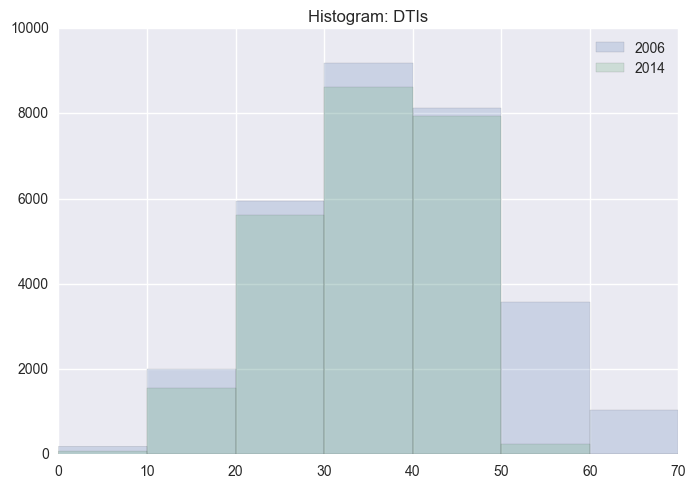

In [35]:
# some data is normally distributed
plt.hist(orig_subset[orig_subset['orig_precrisis']==1]['dti'],bins=7,range=(0,70),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_precrisis']==0]['dti'],bins=7,range=(0,70),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: DTIs');

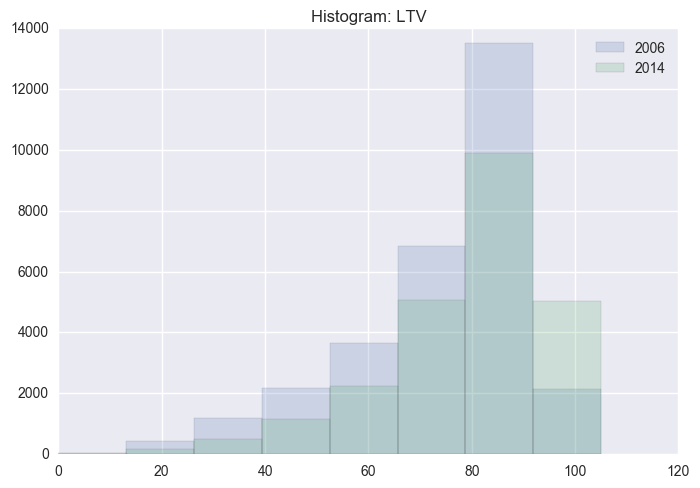

In [36]:
# Some data is skewed:
plt.hist(orig_subset[orig_subset['orig_precrisis']==1]['ltv'],bins=8,range=(0,105),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_precrisis']==0]['ltv'],bins=8,range=(0,105),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: LTV');


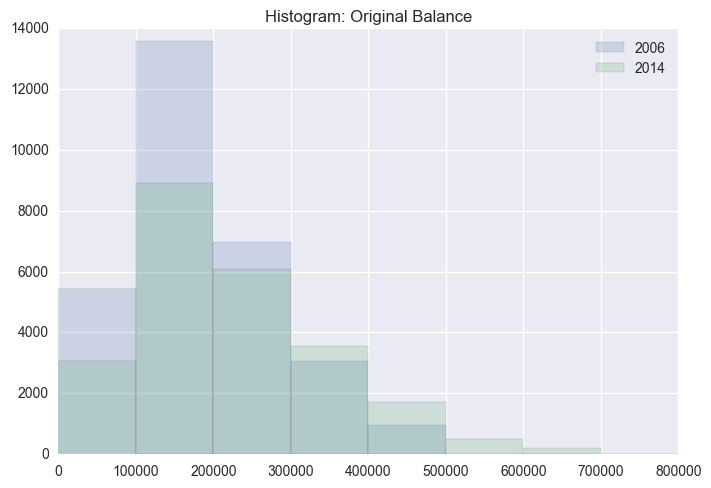

In [37]:
plt.hist(orig_subset[orig_subset['orig_precrisis']==1]['orig_bal'],bins=8,range=(0,800000),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_precrisis']==0]['orig_bal'],bins=8,range=(0,800000),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: Original Balance');

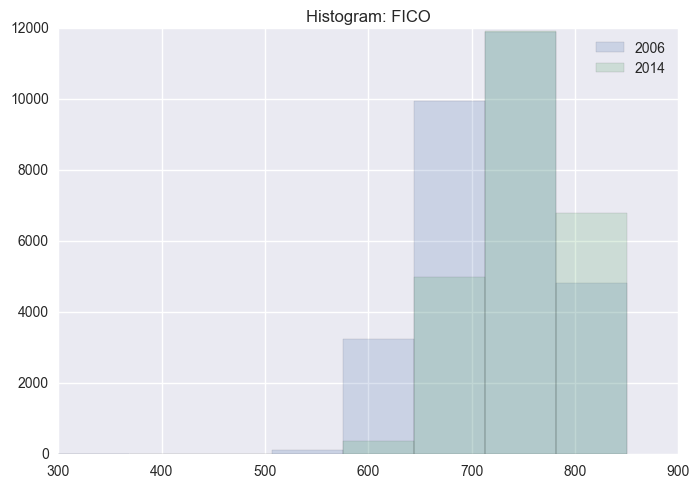

In [38]:
# and some data super skewed.  but this is ok.   
plt.hist(orig_subset[orig_subset['orig_precrisis']==1]['fico'],bins=8,range=(300,850),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_precrisis']==0]['fico'],bins=8,range=(300,850),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: FICO');

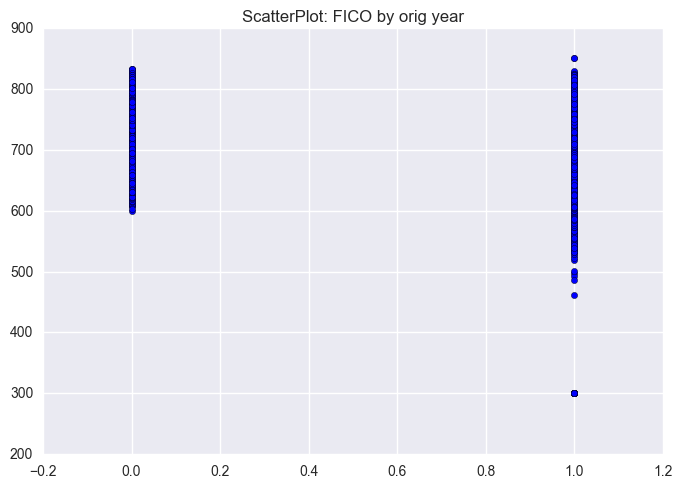

In [39]:
#We think the presence of low FICO scores in 2006 is important and hope this shows up in our clusters
plt.scatter(orig_subset['orig_precrisis'],orig_subset['fico'])
plt.title('ScatterPlot: FICO by orig year');

### Next steps:  since we have all numerical variables, can perform our k-means clustering analysis.

we are hoping our clustering analysis is able to use origination year (orig_precrisis) as a defining attribute

In [40]:
example = orig_subset.copy()
example.shape

(54107, 9)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#we need to scale features so we can send them to k-means
scale = StandardScaler()

In [42]:
# fit and transform in one step
X_scale = scale.fit_transform(example)


K-Means Documentation
- Parameters:
- n_clusters: number of cluster centers we want
- max_iter: number of times we want k-means to keep refinding cluster centers before it stops (higher means the algo will take longer)
- n_init: number of separate times k-means will be run in an attempt to find best convergence (higher means will take longer)
- init: how/where to start cluster centers


In [43]:
# Next Apply k-means (I kept a random state bc i knew i would work on this over time)
# we start with 2 clusters- hoping orig year is the most defining attribute- but its not
km = KMeans(n_clusters=2, n_init=20,random_state=1)
cluster_labels = km.fit_predict(X_scale)

In [44]:
# inertia score is poor above and we see that its not clustering by orig year correctly.  
# instead clustering by purchase vs refi
km = KMeans(n_clusters=2, n_init=20, random_state=1)
km.fit(X_scale)
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=example.columns)

,0,1
fico,720.508967,742.864387
owner_occ,0.931615,0.891610
dti,36.276777,35.377029
orig_bal,200752.770057,201274.170378
ltv,67.512698,81.490052
retail,0.445913,0.454389
purchase,0.027110,0.998743
num_borrowers,1.545787,1.549526
orig_precrisis,0.659597,0.456508


In [45]:
# look at cluster performance using inertia (how accurately a datapoint belongs to the clusters we defined)
print km.inertia_

420490.422875


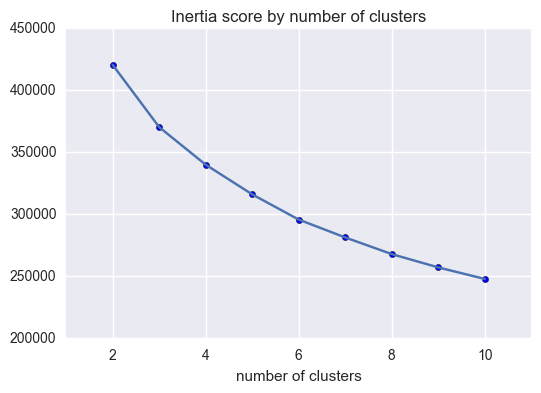

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

def inertiaplot(A):
    
    x = []
    y = []
    for n in range(2,11):
        km = KMeans(n_clusters=n, random_state=1)
        km.fit(A)
        x.append(n)
        y.append(km.inertia_)
    plt.scatter(x, y)
    plt.plot(x,y)
    plt.title('Inertia score by number of clusters')
    plt.xlabel('number of clusters')
    
inertiaplot(X_scale)

In [47]:
# no defined inflection point but slope flattens at 6 clusters, 
# clusters here look much more like intuition
km = KMeans(n_clusters=6, n_init=20, random_state=1)
km.fit(X_scale)
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=example.columns).round(2)

,0,1,2,3,4,5
fico,749.62,725.67,689.48,750.66,748.35,755.22
owner_occ,1.00,1.00,1.00,1.00,0.00,1.00
dti,33.26,38.30,39.65,35.80,34.94,30.20
orig_bal,171240.73,180191.55,188935.86,369468.69,159470.53,151946.77
ltv,85.17,80.89,74.16,75.93,71.99,48.37
retail,0.57,0.37,0.31,0.43,0.49,0.62
purchase,0.83,1.00,0.00,0.47,0.63,0.18
num_borrowers,1.41,1.56,1.55,1.74,1.57,1.54
orig_precrisis,0.00,1.00,0.94,0.10,0.49,0.68


#### 2014 clusters (0, 3): 

0 - top notch new homebuyers (starter homes):  very high credit score, carrying low level of debt, but loan size and downpayment small

3 - the super rich (mcmansions): highest credit, largest loan sizes, put down 25% downpayment

#### 2006 clusters (1, 2):
1 - debt-burdened new homebuyers : high DTI ratios, just average credit scores, put down the minimum acceptable downpayment (20%)

2 - the struggling house-as-ATMers : worst credit scores and highest debt ratios, and 100% refinance loans; these borrowers likely refinanced to free up some cash to pay off their debts

#### clusters apparent pre and post crisis (4, 5):
4 - the sophisticated investors : exclusively small investment properties, borrower has good credit

5 - the responsible refinancer : over 50% equity in their home!  high credit score, lowest DTI ration, and high refi %

### what we like about this output:
1) outputs come in generally as expected matching mean, median and intuition 

2) almost all features are significant, meaning for any one feature it does not have the same results across column

### what we dislike:  

six clusters is a lot to explain.   

In [48]:
# again no defined inflection point but look at 3 clusters, which is materially better than 2 
# clusters here look much more like intuition
km = KMeans(n_clusters=3, n_init=20, random_state=1)
km.fit(X_scale)
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=example.columns).round(2)

,0,1,2
fico,748.99,716.08,748.38
owner_occ,1.00,1.00,0.00
dti,33.98,37.38,34.95
orig_bal,231588.67,184156.90,162141.05
ltv,78.89,71.95,71.95
retail,0.54,0.38,0.48
purchase,0.64,0.42,0.63
num_borrowers,1.52,1.57,1.57
orig_precrisis,0.01,0.99,0.49


#### 2014 cluster 0: 
top notch homeowners:  very high credit score, carrying low level of debt, mostly buying homes but some refinancing

#### 2006 cluster 1:
debt heavy blemished homeowners:  materially worse credit scores, high debt to income ratios, the majority of which have been solicited perhaps to cash out (low retail %, lower purchase %)

#### found equally in both years 2:
the sophisticated investor:  exclusively small investment properties, borrower has very strong credit


### Last steps:  eliminate non-defining feature: number of borrowers

In [49]:
example2 = orig_subset.drop(['num_borrowers'],axis=1)
example2.shape

(54107, 8)

In [50]:
X2_scale = scale.fit_transform(example2)

km2 = KMeans(n_clusters=2, n_init=20, random_state=1)
cluster_labels2 = km2.fit_predict(X2_scale)

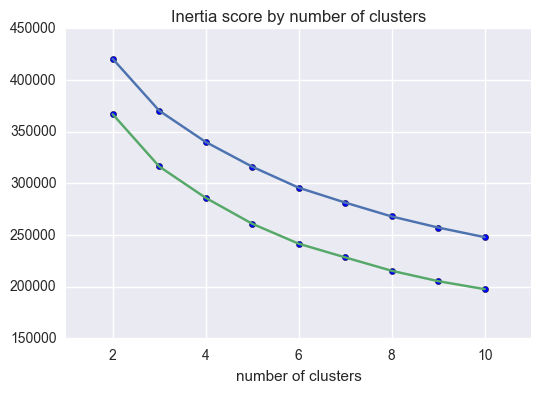

In [51]:
# no change in inflection point but inertia improves meaningfully when we drop the non-distinct feature.  
inertiaplot(X_scale)
inertiaplot(X2_scale)

In [52]:
#Our clusters are near identical except for some reason, scikit learn reordered them

X2_scale = scale.fit_transform(example2)

km2 = KMeans(n_clusters=3, n_init=20, random_state=1)
cluster_labels2 = km2.fit_predict(X2_scale)

km2.fit(X2_scale)
columns2 = {str(x): scale.inverse_transform(km2.cluster_centers_[x]) for x in range(0,len(km2.cluster_centers_))}
pd.DataFrame(columns2, index=example2.columns).round(2)

,0,1,2
fico,748.38,749.18,715.94
owner_occ,0.00,1.00,1.00
dti,34.95,33.96,37.40
orig_bal,162141.05,232070.85,183789.97
ltv,71.95,78.95,71.91
retail,0.48,0.54,0.37
purchase,0.63,0.64,0.42
orig_precrisis,0.49,0.01,0.99


#### 2014 cluster 2:
top notch homeowners: very high credit score, carrying low level of debt, mostly buying homes but some refinancing
#### 2006 cluster 1:
debt heavy blemished homeowners: materially worse credit scores, high debt to income ratios, the majority of which have been solicited perhaps to cash out (low retail %, lower purchase %)
#### found equally in both years cluster 0:
the sophisticated investor: exclusively small investment properties, borrower has very strong credit

### Business Implications:
#### Investment opportunity: 
Many investors took losses as the poor underwriting pre-crisis lead to default.  Now underwriting is better so investors should revisit MBS!

#### Marketing perspective: 
The recent borrowers (2014) were strong credit homebuyers; anyone with access to a borrowers credit history should cross market mortgage loans to their existing borrowers.  
 - e.g. banks who also issue credit cards (e.g. chase, citibank)
 - student loan companies may also want to issue mortgages (e.g. SoFi) 

Keep marketing to investors in lower median home price areas

### Caveats to our analysis:
We aimed for a simple, intuitive analysis.  This meant we controlled for the most generic type of mortgage and eliminated some features that would have resulted in a LOT of boolean variables, e.g. State and Servicer.  However, if we took these features into account we could possibly see different clusters (helpful for a marketing perspective)

We used single years 2006 and 2014 as proxies for pre- and post origination; these may not be robust enough to generalize the whole periods.  

Lastly, we use 2014 to represent current dynamics since it was the last data set presented to us that was fully populated (50,000 loans).  Of course, lending patterns may have changed between then and now.  